In [5]:
import pandas as pd
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.size

750

In [9]:
df.shape

(150, 5)

In [10]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


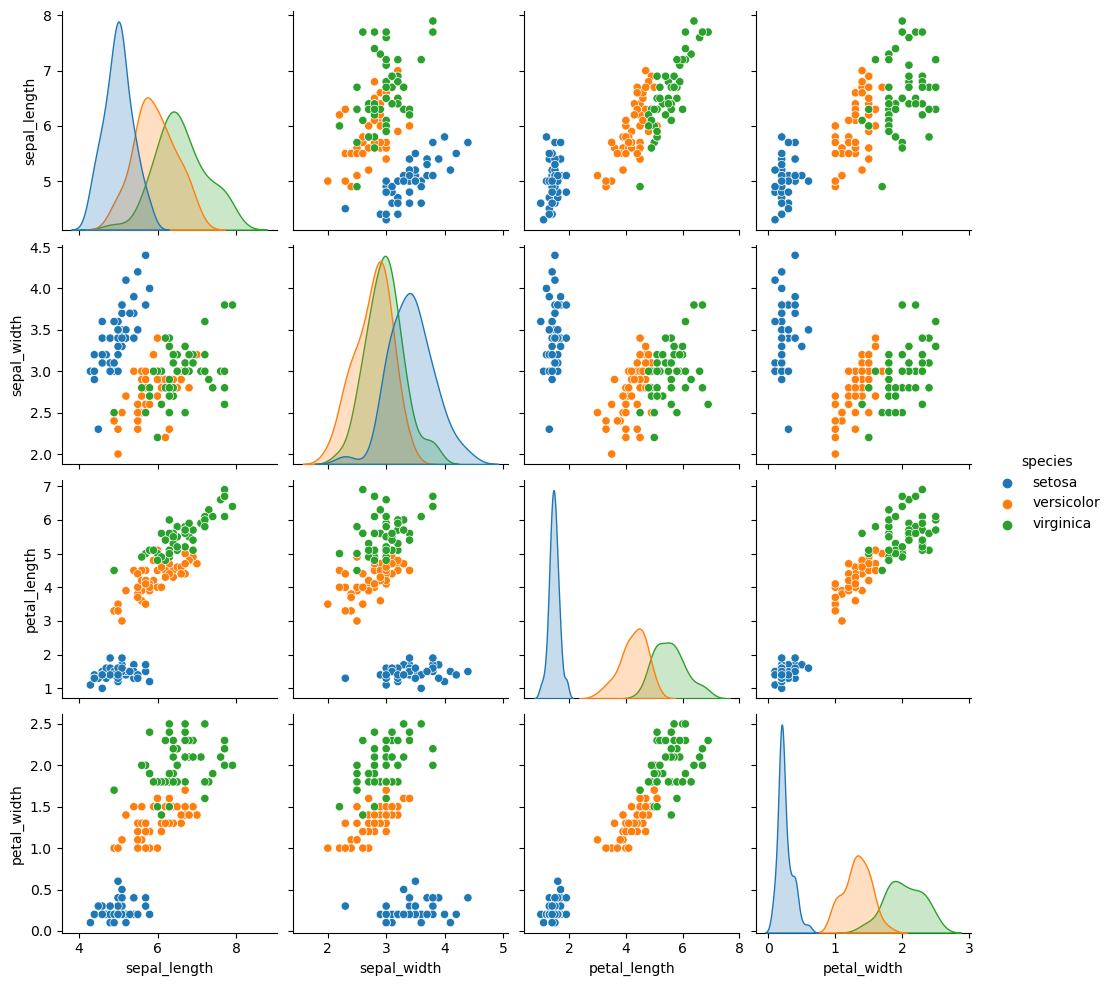

In [15]:
sns.pairplot(data=df, hue='species')

<Axes: >

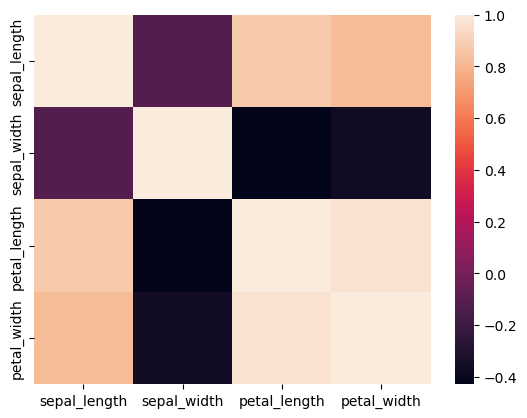

In [16]:
sns.heatmap(df.drop('species', axis=1).corr())

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(df['species'])

In [18]:
y[0:5]

array([0, 0, 0, 0, 0])

In [19]:
x=df.drop('species',axis=1)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train, y_train)
y_predicted=dtree.predict(x_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predicted))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [24]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

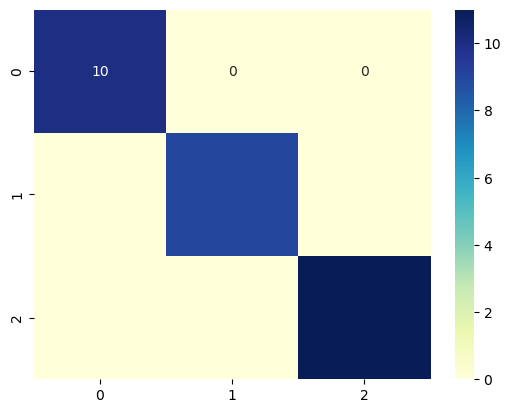

In [26]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_predicted)), annot=True, cmap='YlGnBu')

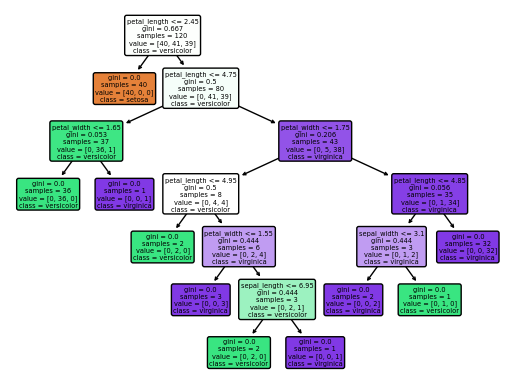

In [28]:
from sklearn.tree import plot_tree
plot=plot_tree(decision_tree=dtree, feature_names=df.columns, class_names=["setosa","versicolor","virginica"], filled=True, rounded=True)

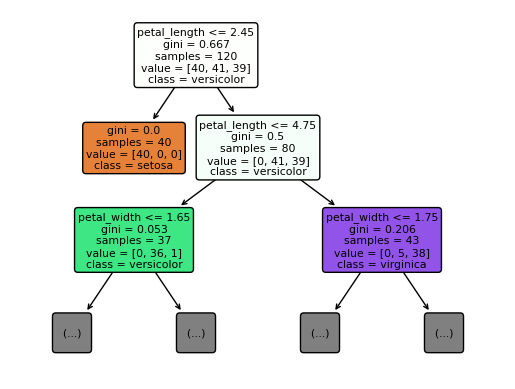

In [29]:
plot1=plot_tree(decision_tree=dtree, feature_names=df.columns, class_names=["setosa","versicolor","virginica"], max_depth=2, filled=True, rounded=True)